In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils import Green_func

In [3]:
def generate_data(N = 50, num_of_coeffs=10, samples=2000):

    x = np.linspace(0.0, 1, N)
    y = np.linspace(0.0, 1, N)
    dx = x[1] - x[0]
    dy = y[1] - y[0]

    x = x + dx/2
    y = y + dy/2
    indices = np.where(x < 1)
    x = x[indices]
    y = y[indices]

    green_over_midpoint_grid = Green_func(x[:, None], y[None, :])

    phase = np.random.uniform(0 , 2 * np.pi, (samples, num_of_coeffs))
    freqs = np.random.uniform(0 , 2000, (samples, num_of_coeffs))
    multipliers = np.random.uniform(-10 , 10, (samples, num_of_coeffs))

    input_signals = np.zeros((samples, len(x)))

    for j in range(samples):
        for i in range(num_of_coeffs):
            input_signals[j] += multipliers[j, i] * np.sin(2 * np.pi * freqs[j, i] * x + phase[j, i])

    output_signals = np.zeros_like(input_signals)

    for i,sig in enumerate(input_signals):
        u = np.trapz(green_over_midpoint_grid * sig, x, axis=1)
        output_signals[i] = u


    train_x, train_y = input_signals[:1500], output_signals[:1500]
    test_x, test_y = input_signals[1500:], output_signals[1500:]

    print("Train shape:", train_x.shape, train_y.shape)
    print("Test shape:", test_x.shape, test_y.shape)

    return train_x, train_y, test_x, test_y, x, y

In [4]:
low_train_x, low_train_y, low_test_x, low_test_y, x_low, y_low = generate_data(N=50, num_of_coeffs=10, samples=2000)
high_train_x, high_train_y, high_test_x, high_test_y, x_high, y_high = generate_data(N=100, num_of_coeffs=10, samples=2000)

Train shape: (1500, 49) (1500, 49)
Test shape: (500, 49) (500, 49)
Train shape: (1500, 99) (1500, 99)
Test shape: (500, 99) (500, 99)


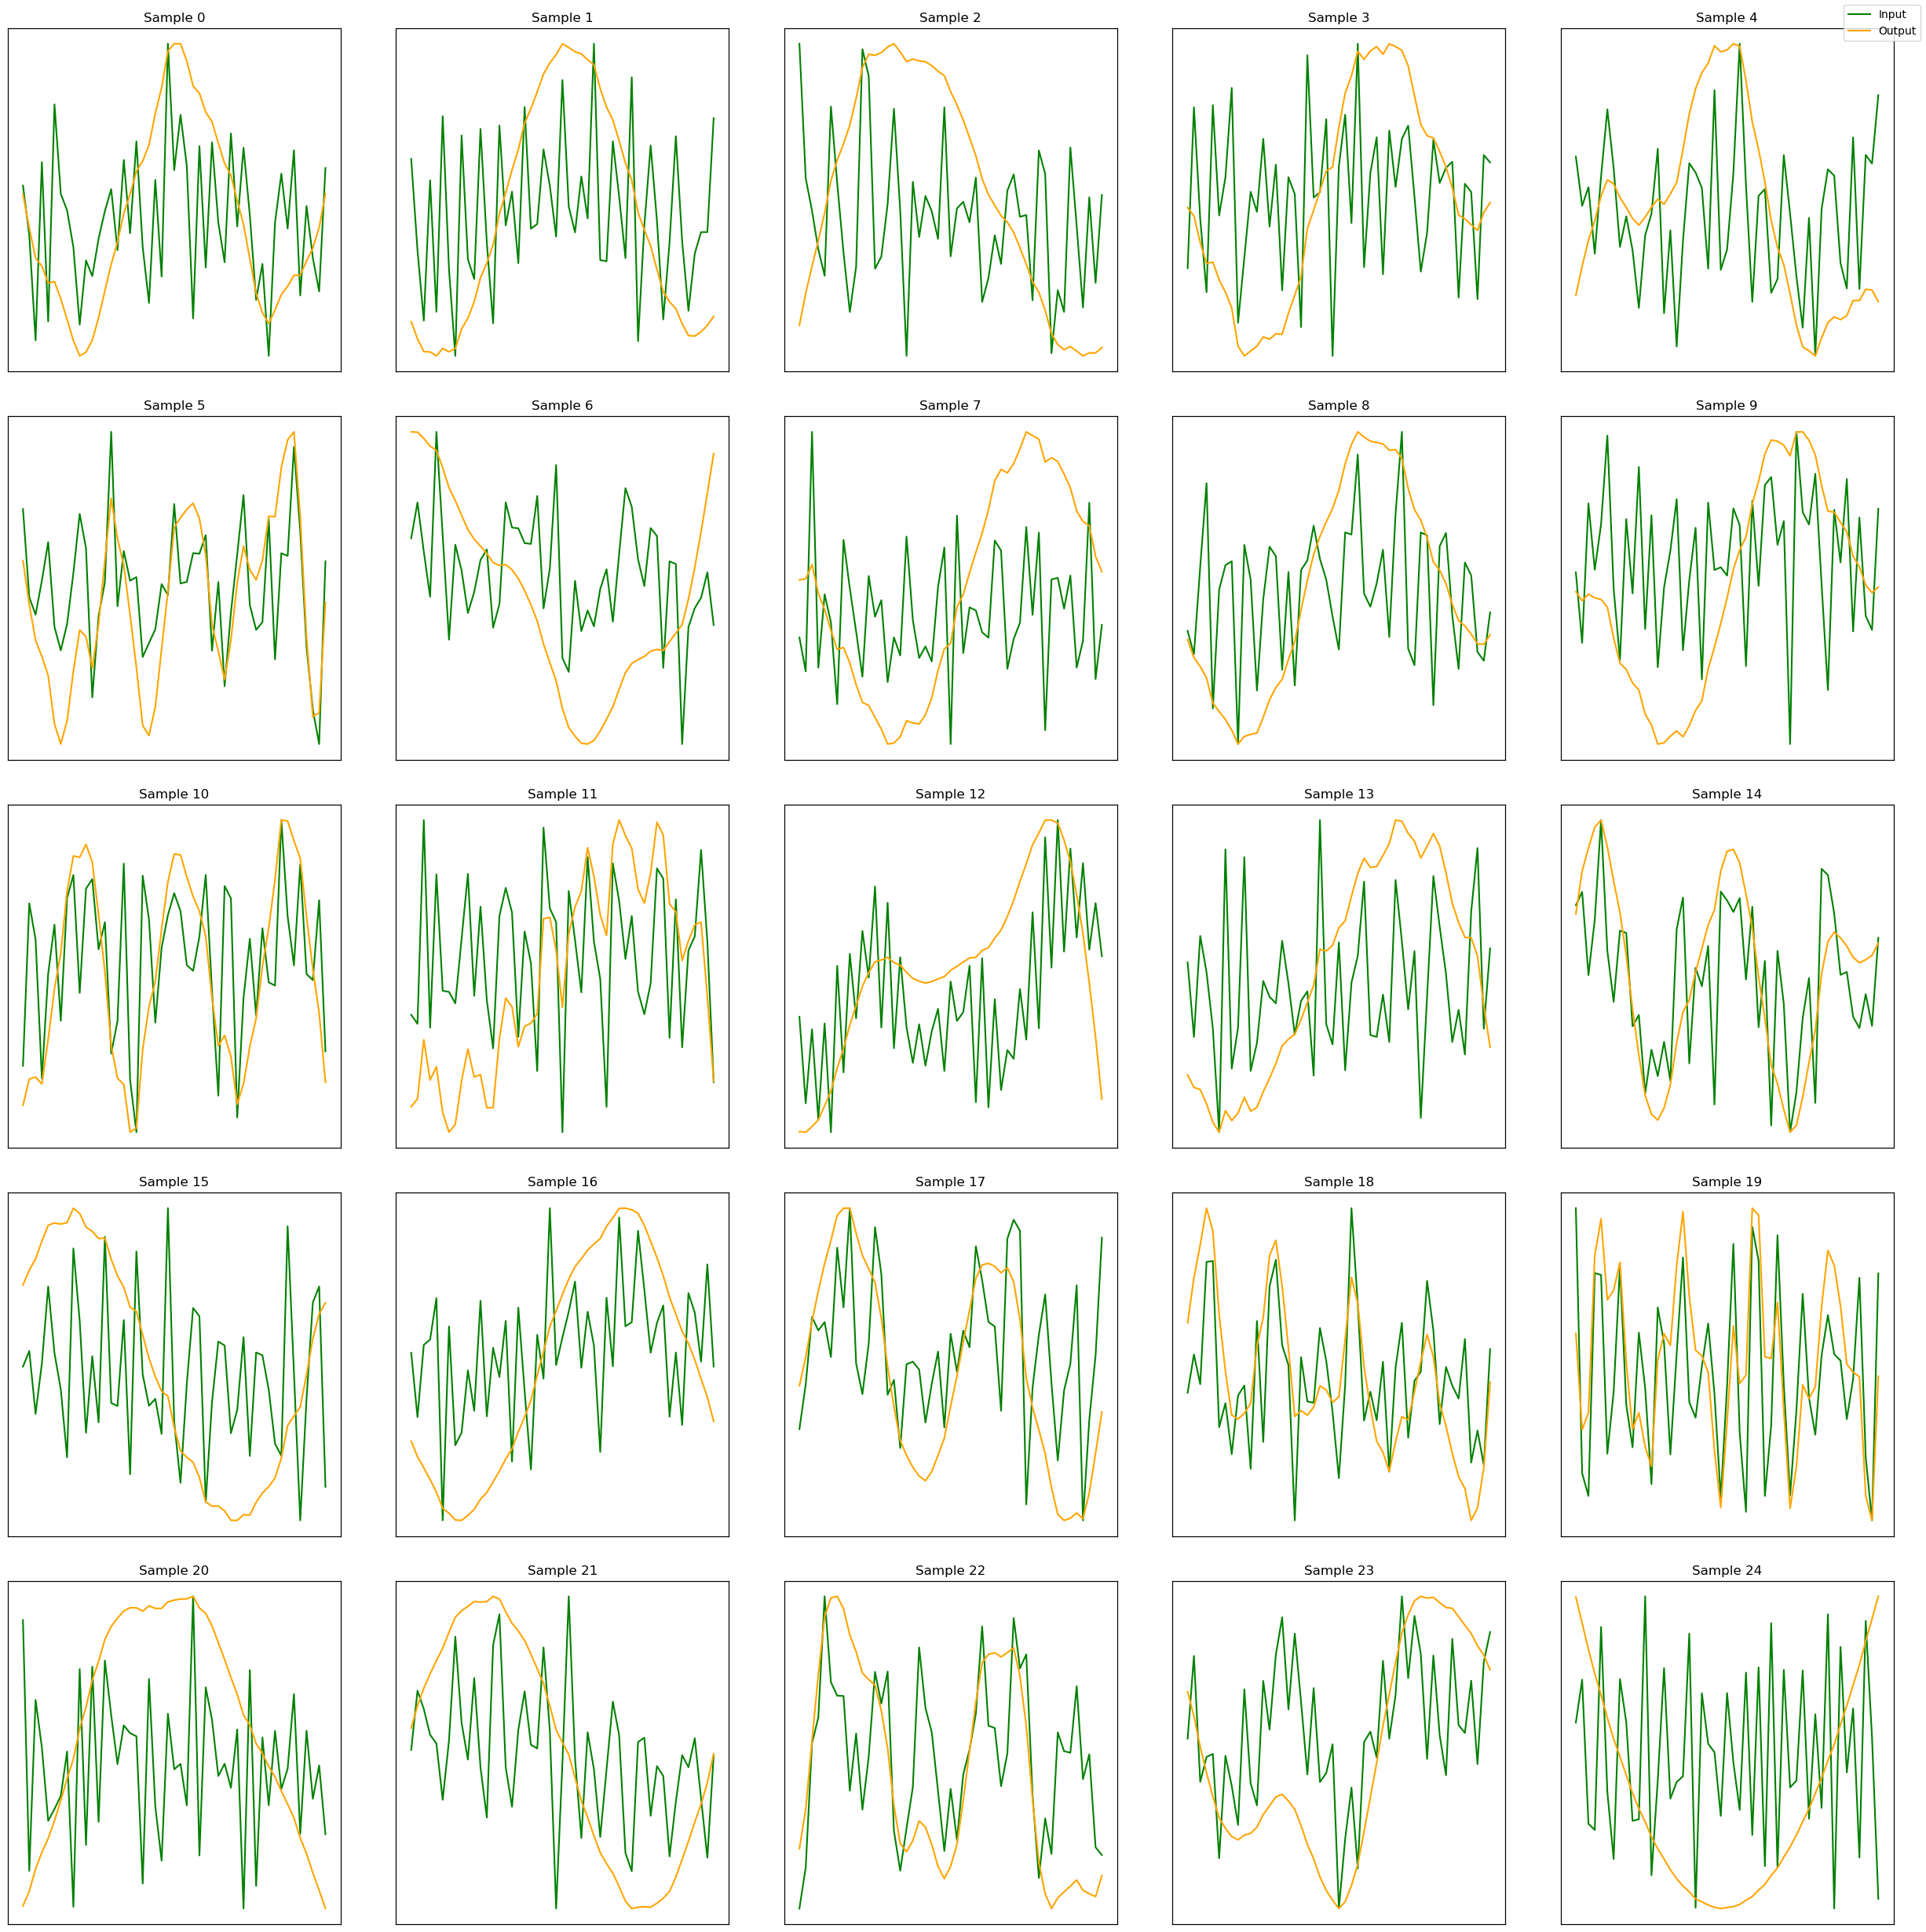

In [5]:
num_plots = 25

fig, axes = plt.subplots(5, 5, figsize=(25, 25))
fig.tight_layout(pad=2.0)

for idx, ax in enumerate(axes.flat):
    input_signal = low_train_x[idx]
    output_signal = low_train_y[idx]

    # Plot input signal on primary y-axis
    ln1 = ax.plot(x_low, input_signal, label='Input', color='green')

    # Create secondary y-axis for output signal
    ax2 = ax.twinx()
    ln2 = ax2.plot(x_low, output_signal, label='Output', color='orange')

    ax.set_xticks([])
    ax.set_yticks([])
    ax2.set_yticks([])
    ax.set_title(f"Sample {idx}")

# Add combined legend outside subplots
# Extract handles and labels from last subplot
lines = ln1 + ln2
labels = [l.get_label() for l in lines]
fig.legend(lines, labels, loc='upper right')

plt.show()


In [6]:
pd.DataFrame(low_train_x).to_csv("signal_data/signals_low_train_x.csv", index=False)
pd.DataFrame(low_train_y).to_csv("signal_data/signals_low_train_y.csv", index=False)
pd.DataFrame(low_test_x).to_csv("signal_data/signals_low_test_x.csv", index=False)
pd.DataFrame(low_test_y).to_csv("signal_data/signals_low_test_y.csv", index=False)
pd.DataFrame(x_low).to_csv("signal_data/signals_x_low.csv", index=False)
pd.DataFrame(y_low).to_csv("signal_data/signals_y_low.csv", index=False)

pd.DataFrame(high_train_x).to_csv("signal_data/signals_high_train_x.csv", index=False)
pd.DataFrame(high_train_y).to_csv("signal_data/signals_high_train_y.csv", index=False)
pd.DataFrame(high_test_x).to_csv("signal_data/signals_high_test_x.csv", index=False)
pd.DataFrame(high_test_y).to_csv("signal_data/signals_high_test_y.csv", index=False)
pd.DataFrame(x_high).to_csv("signal_data/signals_x_high.csv", index=False)
pd.DataFrame(y_high).to_csv("signal_data/signals_y_high.csv", index=False)